## Tacotron2 (Baseline TTS)

In [10]:
sample_text = '''
Marijuana legalization presents an opportunity to promote public health, reduce crime, and generate tax revenue. 
Evidence suggests that regulation can ensure safer consumption, reduce the burden on the criminal justice system, and direct law enforcement resources toward more serious crimes. 
Additionally, the economic benefits of legal cannabis industries, including job creation and tax revenue, have been demonstrated in states where it is already legal. 
By focusing on regulation over prohibition, we can ensure a more effective and balanced approach to marijuana use and its societal impact.
'''

In [ ]:
import torch
from TTS.api import TTS

device = "cuda" if torch.cuda.is_available() else "cpu"
Tacotron2 = TTS("tts_models/en/ljspeech/tacotron2-DDC").to(device)

100%|██████████| 896M/896M [15:06<00:00, 989kiB/s] 
100%|██████████| 113M/113M [00:03<00:00, 37.1MiB/s]
 54%|█████▍    | 2.06M/3.80M [00:00<00:00, 16.0MiB/s]

100%|██████████| 3.80M/3.80M [00:11<00:00, 16.0MiB/s]

In [12]:
Tacotron2.tts_to_file(
    sample_text,
    file_path="good_outputs/taco2_speaker_base.wav"
)

'good_outputs/taco2_speaker_base.wav'

## FreeVC

In [ ]:
import torch
from TTS.api import TTS

device = "cuda" if torch.cuda.is_available() else "cpu"
FreeVC = TTS("voice_conversion_models/multilingual/vctk/freevc24").to(device)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/coqpit/coqpit.py:864: UserWarning: Type mismatch in FreeVCConfig
Failed to deserialize field: test_sentences (list[str]) = [["It took me quite a long time to develop a voice, and now that I have it I'm not going to be silent."], ['Be a voice, not an echo.'], ["I'm sorry Dave. I'm afraid I can't do that."], ["This cake is great. It's so delicious and moist."], ['Prior to November 22, 1963.']]
Replaced it with field's default value: []
  self.deserialize(data)


'good_outputs/Obama/obama_to_taco2.wav'

In [ ]:
# Obama
FreeVC.voice_conversion_to_file(
    source_wav="good_outputs/Obama/obama_output_fishspeech.wav",
    target_wav="good_outputs/taco2_speaker_base.wav",
    file_path="good_outputs/Obama/obama_to_taco2.wav"
    
)

In [14]:
# Trump
FreeVC.voice_conversion_to_file(
    source_wav="good_outputs/Trump/trump_output_fishspeech.wav",
    target_wav="good_outputs/taco2_speaker_base.wav",
    file_path="good_outputs/Trump/trump_to_taco2.wav"
)

'good_outputs/Trump/trump_to_taco2.wav'

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
# function to generation mel spectrogram
def show_mel_spectrogram(filepath, title):
    array, sr = librosa.load(filepath)
    S = librosa.feature.melspectrogram(y=array, sr=sr)
    S_db = librosa.power_to_db(S, ref=np.max)
    plt.figure().set_figwidth(12)
    librosa.display.specshow(S_db, x_axis="time", y_axis="mel", sr=sr)    
    plt.title(title)
    plt.colorbar()

### Spectrograms

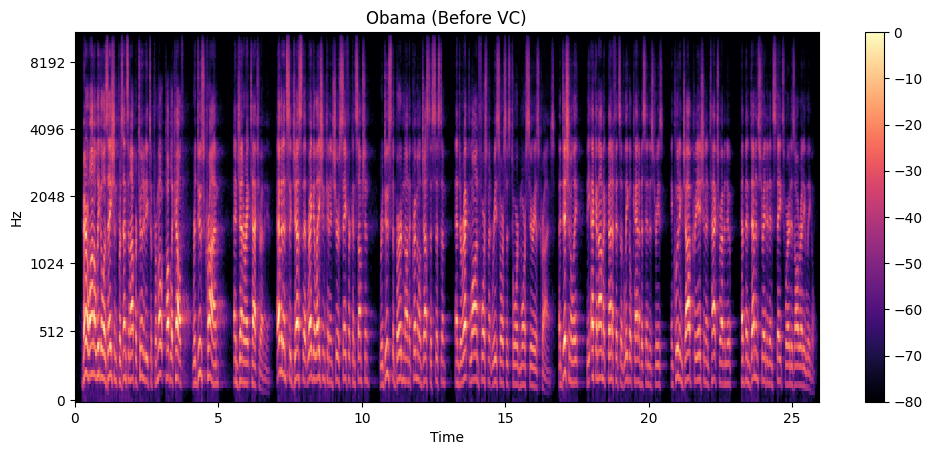

In [3]:
# Obama: generate before mel
show_mel_spectrogram(filepath="good_outputs/Obama/obama_output_fishspeech.wav", title="Obama (Before VC)")

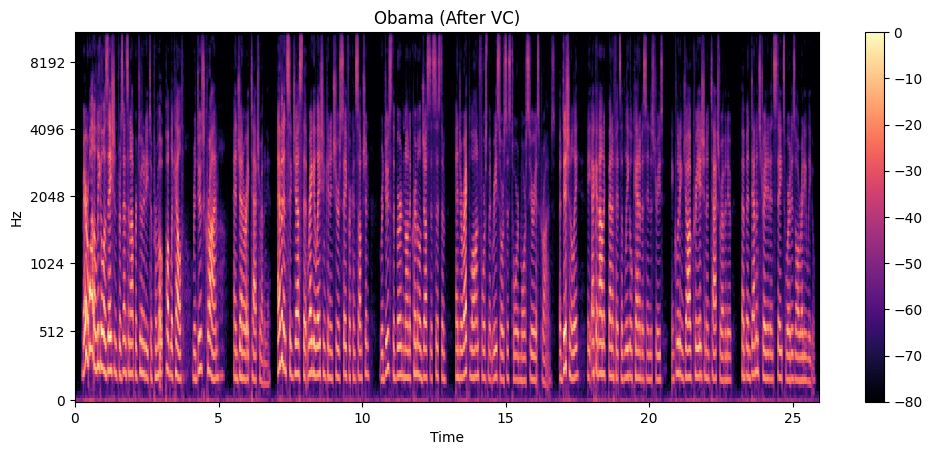

In [4]:
# Obama: generate after mel
show_mel_spectrogram(filepath="good_outputs/Obama/obama_to_taco2.wav", title="Obama (After VC)")

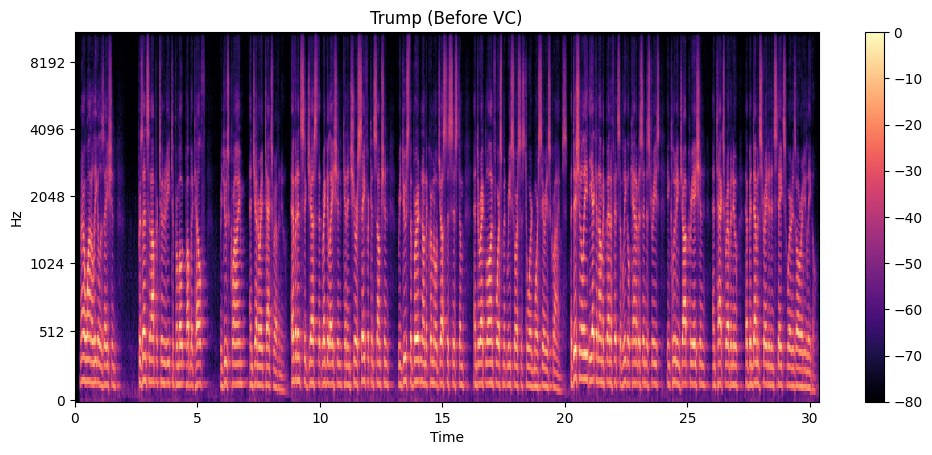

In [5]:
# Trump: generate before mel 
show_mel_spectrogram("good_outputs/Trump/trump_output_fishspeech.wav", title="Trump (Before VC)")

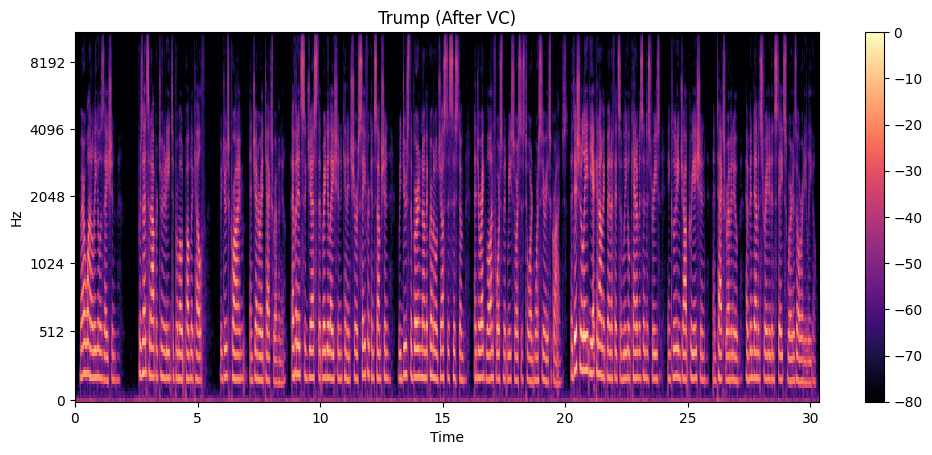

In [6]:
# Trump: generate after mel
show_mel_spectrogram("good_outputs/Trump/trump_to_taco2.wav", title="Trump (After VC)")

### Frequency Calculations

In [36]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
def estimate_frequencies(filepath, title):
    y, sr = librosa.load(filepath)
    f0s = librosa.yin(y, sr=sr, fmin=65, fmax=2093)
    fig, ax = plt.subplots()
    ax.plot(f0s)
    ax.set_title(title)
    ax.set_ylabel("Fundamental Frequency (F0)")
    ax.set_xlabel("Frame")
    return f0s

In [47]:
def print_statistics(f0s):
    mean = np.mean(f0s)
    std = np.std(f0s)
    cv = std/mean
    print("Mean:", mean)   
    print("Standard Deviation:", std)
    print("Coefficient of Variation (CV):", cv)
    

Mean: 315.48299175908807
Standard Deviation: 407.7421528857058
Coefficient of Variation (CV): 1.2924378287786416


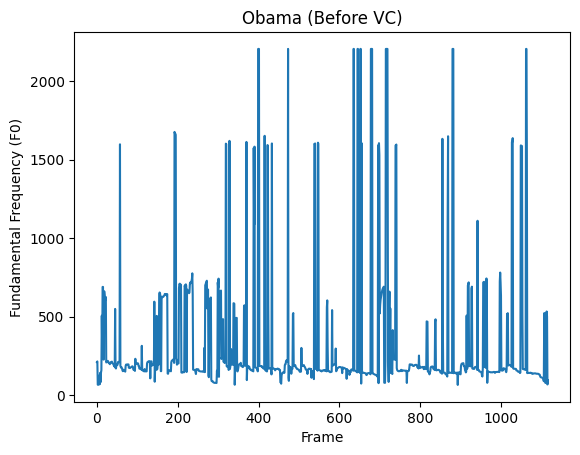

In [48]:
# Obama (Before VC)
obama_bf_f0s = estimate_frequencies("good_outputs/Obama/obama_output_fishspeech.wav", "Obama (Before VC)")
print_statistics(obama_bf_f0s)

Mean: 343.10868812090877
Standard Deviation: 458.1279603559317
Coefficient of Variation (CV): 1.335226930174648


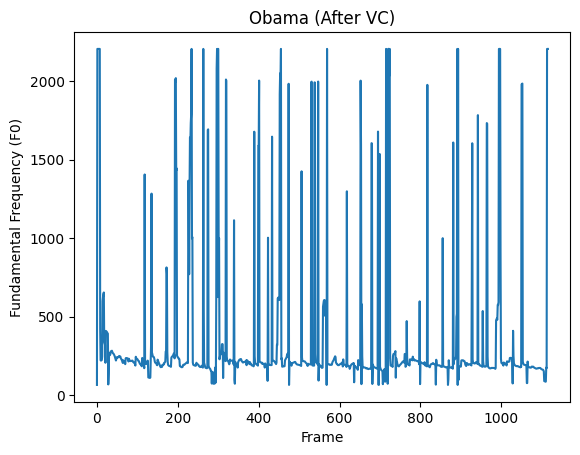

In [49]:
# Obama (After VC)
obama_af_f0s = estimate_frequencies("good_outputs/Obama/obama_to_taco2.wav", "Obama (After VC)")
print_statistics(obama_af_f0s)

Mean: 176.47364826182667
Standard Deviation: 236.36556548736053
Coefficient of Variation (CV): 1.3393816460159236


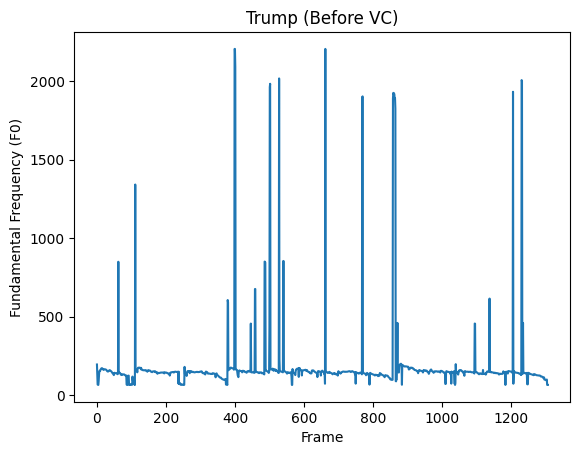

In [50]:
# Trump (Before VC)
trump_bf_f0s = estimate_frequencies("good_outputs/Trump/trump_output_fishspeech.wav", "Trump (Before VC)")
print_statistics(trump_bf_f0s)

Mean: 384.79702099592276
Standard Deviation: 558.4755213261225
Coefficient of Variation (CV): 1.4513509483017542


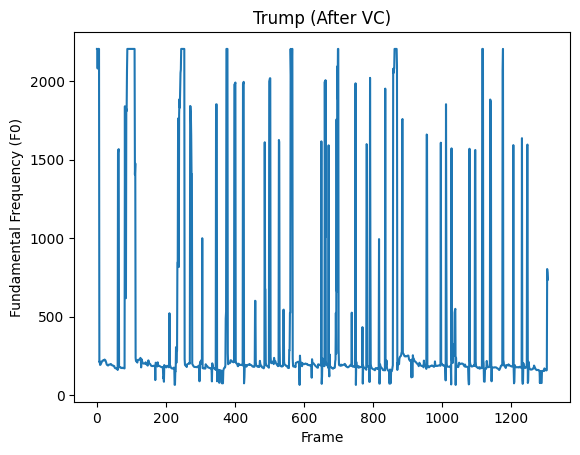

In [51]:
# Trump (After VC)
trump_af_f0s = estimate_frequencies("good_outputs/Trump/trump_to_taco2.wav", "Trump (After VC)")
print_statistics(trump_af_f0s)

Mean: 411.51828924416634
Standard Deviation: 562.9478619654021
Coefficient of Variation (CV): 1.3679777465039664


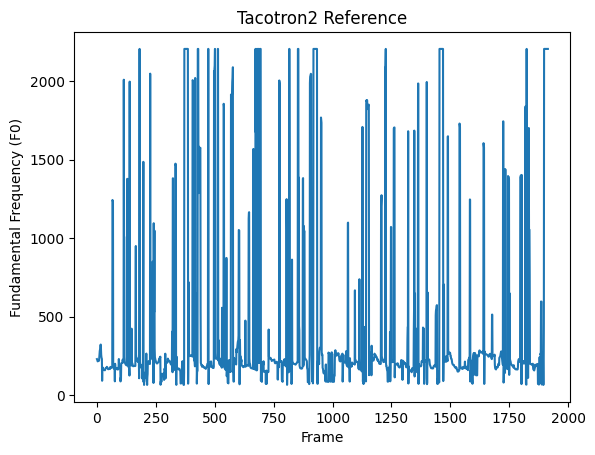

In [53]:
# Baseline VC
taco2_f0s = estimate_frequencies("good_outputs/taco2_speaker_base.wav", "Tacotron2 Reference")
print_statistics(taco2_f0s)

## kNN-VC

## OpenVoice

## StreamVC

In [54]:
import librosa
from IPython import display

import src.synthesizer as synthesizer

ModuleNotFoundError: No module named 'src.synthesizer'